In [3]:
from train import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
number_of_train_test_splits = 100
PARAMS

{'cv_folds': 5,
 'div_const': 100,
 'dropout': 0.0,
 'layers': [100, 100],
 'learning_rate': 0.01,
 'max_steps': 100,
 'test_ratio': 0.2,
 'training_set_size': 90000}

In [5]:
all_data = tf.contrib.learn.datasets.base.load_csv_without_header(
    filename="micro_data.csv",
    target_dtype=np.float32,
    features_dtype=np.float32) 

X = all_data.data[:,:15]
y = all_data.target / PARAMS['div_const']
X = (X - np.mean(X, axis=0, keepdims=True))/np.std(X, axis=0, keepdims=True)

y_std = np.std(y)
y_mean = np.mean(y)

In [14]:
def get_errors(actual, predicted):
    actual = actual.flatten()
    predicted = predicted.flatten()
    actual = actual * y_std + y_mean
    predicted = predicted * y_std + y_mean
    error = np.abs(actual - predicted)
    rel_error = np.abs(actual - predicted) / actual
    return {
        "relative_max_err":np.max(rel_error), 
        "relative_avg_err":np.mean(rel_error)
    }

def get_error_distribution(X, y, model, number_of_splits):
    stats_dicts = []
    for i in range(number_of_splits):
        print("\r", i, end = "")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=PARAMS['test_ratio'])
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
        stats_dicts.append(get_errors(y_test, pred))
        
    stats_df = pd.DataFrame(stats_dicts)
    return stats_df

# Linear Regression

In [15]:
lin_reg = LinearRegression()

In [16]:
stats_df = get_error_distribution(X, y, lin_reg, number_of_train_test_splits)

 99

In [17]:
stats_df.mean(axis=0)

relative_avg_err    0.071516
relative_max_err    0.300497
dtype: float64

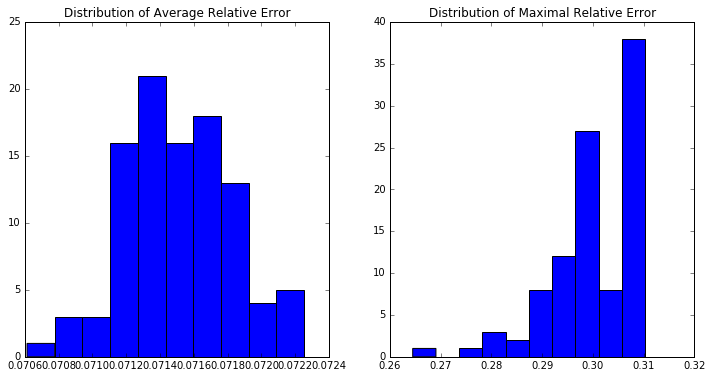

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1, title = "Distribution of Average Relative Error")
plt.hist(stats_df["relative_avg_err"].values)
plt.subplot(1, 2, 2, title = "Distribution of Maximal Relative Error")
plt.hist(stats_df["relative_max_err"].values)
plt.show()

# Random Forest

In [22]:
rf = RandomForestRegressor(30, n_jobs=4)
number_of_train_test_splits = 30

In [23]:
stats_df = get_error_distribution(X, y, rf, number_of_train_test_splits)

 29

In [24]:
stats_df.mean(axis=0)

relative_avg_err    0.022584
relative_max_err    0.113705
dtype: float64

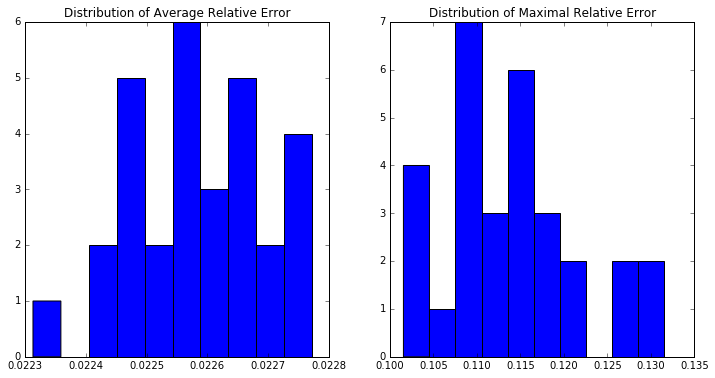

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1, title = "Distribution of Average Relative Error")
plt.hist(stats_df["relative_avg_err"].values)
plt.subplot(1, 2, 2, title = "Distribution of Maximal Relative Error")
plt.hist(stats_df["relative_max_err"].values)
plt.show()